<a href="https://www.kaggle.com/code/tridibraj/brain-tumer-detection-cnn-model-94?scriptVersionId=200753063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Custom Dataset class for loading brain tumor data

In [23]:
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Create dataset instances

In [24]:
train_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Training', transform=train_transform)
test_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Testing', transform=test_transform)

# Create dataloaders & define the CNN model

In [25]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [26]:
pip install torchviz

Note: you may need to restart the kernel to use updated packages.


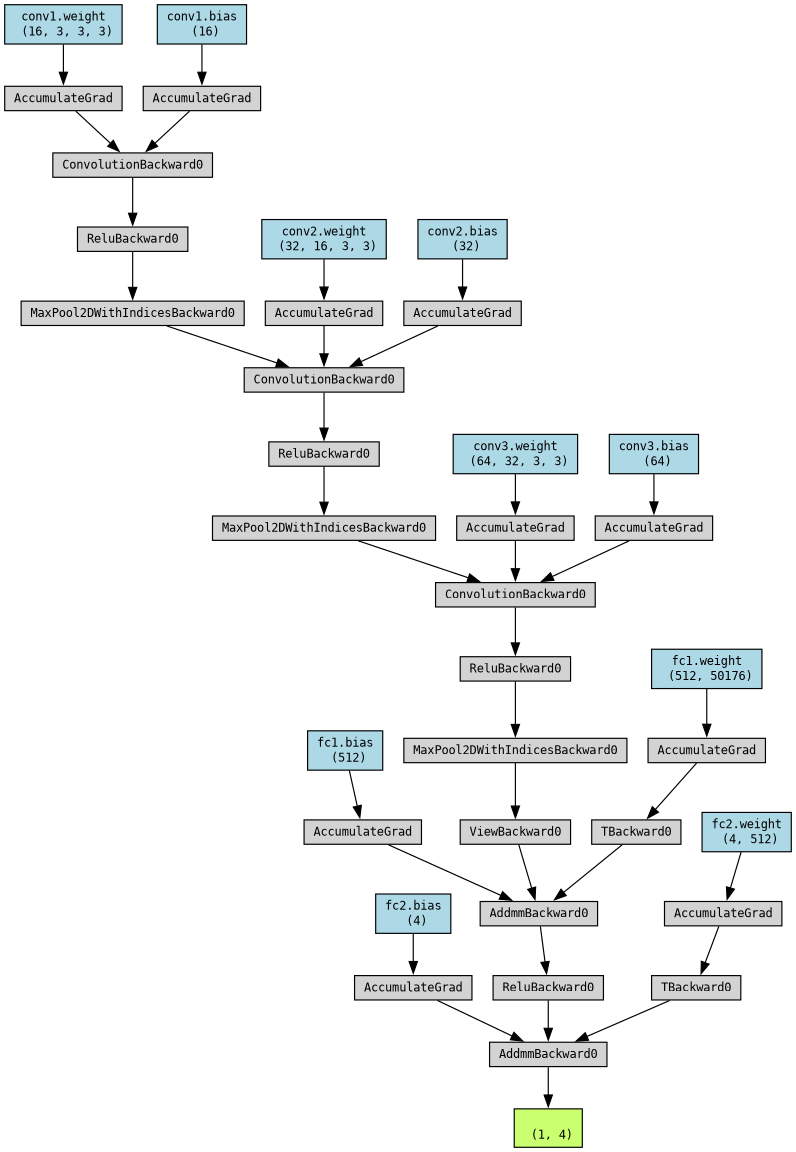

In [27]:
from torchviz import make_dot
from IPython.display import Image

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()
x = torch.randn(1, 3, 224, 224)  # Dummy input
y = model(x)
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('cnn_model')
Image('cnn_model.png')

In [28]:
from torchinfo import summary
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()
summary(model, input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"])


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
CNNModel                                 [1, 3, 224, 224]          [1, 4]                    --                        --                        --
├─Conv2d: 1-1                            [1, 3, 224, 224]          [1, 16, 224, 224]         448                       [3, 3]                    22,478,848
├─MaxPool2d: 1-2                         [1, 16, 224, 224]         [1, 16, 112, 112]         --                        2                         --
├─Conv2d: 1-3                            [1, 16, 112, 112]         [1, 32, 112, 112]         4,640                     [3, 3]                    58,204,160
├─MaxPool2d: 1-4                         [1, 32, 112, 112]         [1, 32, 56, 56]           --                        2                         --
├─Conv2d: 1-5                            [1, 32, 56, 56]           [1, 64, 56, 56]       

In [29]:
model = CNNModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Model save location


In [30]:
save_path = '/kaggle/working/trained_model.pth'

# Ensure the directory exists before saving
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Model Training & Performance evaluation

Epoch [1/10], Loss: 0.6986, Accuracy: 0.7148
Epoch [2/10], Loss: 0.3818, Accuracy: 0.8479
Epoch [3/10], Loss: 0.2356, Accuracy: 0.9118
Epoch [4/10], Loss: 0.1566, Accuracy: 0.9443
Epoch [5/10], Loss: 0.1127, Accuracy: 0.9604
Epoch [6/10], Loss: 0.0701, Accuracy: 0.9757
Epoch [7/10], Loss: 0.0584, Accuracy: 0.9799
Epoch [8/10], Loss: 0.0501, Accuracy: 0.9863
Epoch [9/10], Loss: 0.0257, Accuracy: 0.9914
Epoch [10/10], Loss: 0.0414, Accuracy: 0.9872
Training complete. Best accuracy: 0.9914. Model saved to /kaggle/working/trained_model.pth
Accuracy on test set: 0.9802
Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.99      0.98       300
  meningioma       0.98      0.95      0.96       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.99      0.98      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98   

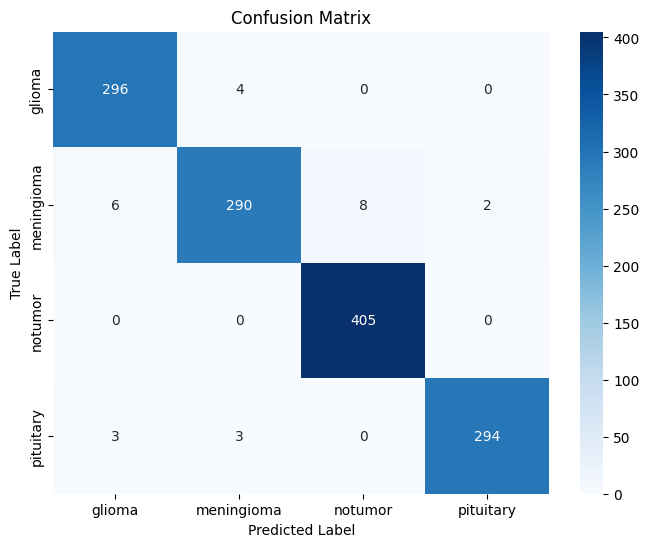

Weighted Precision: 0.9802, Recall: 0.9802, F1-score: 0.9801
Macro-averaged Precision: 0.9802, Recall: 0.9786, F1-score: 0.9793


In [39]:
from PIL import Image
# Train the model and save it to /kaggle/working/
train_model(model, criterion, optimizer, num_epochs=10, save_path=save_path)

# Ensure you unpack two values from test_model
true_labels, predictions = test_model(model)

print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=['glioma', 'meningioma', 'notumor', 'pituitary']))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'], yticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate precision, recall, f1-score
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
print(f"Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")

precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print(f"Macro-averaged Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")


# Test the model

In [40]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms for the testing dataset
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Custom Dataset class for loading brain tumor data
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load the model state dictionary
model_path = '/kaggle/working/trained_model.pth'
state_dict = torch.load(model_path, map_location=device)

# Define your model architecture
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)  # 4 classes
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate your model
model = CNNModel().to(device)

# Load state_dict into your model
model.load_state_dict(state_dict)
model.eval()  # Set the model to evaluation mode

# Create dataset instance for testing
test_dataset = BrainTumorDataset(root_dir='/kaggle/input/brain-tumor-mri-dataset/Testing', transform=test_transform)

# Randomly select 10 images from the test set
num_images = 20
random_indices = np.random.choice(len(test_dataset), num_images, replace=False)

print("Actual Label | Predicted Label")
print("-----------------------------")

# Perform inference on each selected image
for idx in random_indices:
    image, label = test_dataset[idx]
    image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
    
    actual_label = test_dataset.classes[label]
    predicted_label = test_dataset.classes[predicted.item()]
    
    print(f"{actual_label:12} | {predicted_label:14}")



Actual Label | Predicted Label
-----------------------------
pituitary    | pituitary     
notumor      | notumor       
notumor      | notumor       
glioma       | glioma        
pituitary    | pituitary     
glioma       | glioma        
glioma       | glioma        
meningioma   | meningioma    
glioma       | glioma        
meningioma   | meningioma    
meningioma   | meningioma    
meningioma   | glioma        
notumor      | notumor       
glioma       | glioma        
notumor      | notumor       
meningioma   | meningioma    
pituitary    | pituitary     
notumor      | notumor       
pituitary    | pituitary     
pituitary    | pituitary     


# Model Training Function


In [31]:
# def train_model(model, criterion, optimizer, num_epochs=10, save_path='trained_model.pth'):
#     model.train()
#     best_accuracy = 0.0  # Track best accuracy to save the best model
    
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         correct = 0
#         total = 0
        
#         for inputs, labels in train_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item() * inputs.size(0)
            
#             # Calculate accuracy
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
        
#         epoch_loss = running_loss / len(train_dataset)
#         epoch_accuracy = correct / total
        
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
        
#         # Save the model if it has the best accuracy
#         if epoch_accuracy > best_accuracy:
#             best_accuracy = epoch_accuracy
#             torch.save(model.state_dict(), save_path)
    
#     print(f"Training complete. Best accuracy: {best_accuracy:.4f}. Model saved to {save_path}")



# Model testing Function


In [32]:
# def test_model(model):
#     model.eval()
#     correct = 0
#     total = 0
#     predictions = []
#     true_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
            
#             predictions.extend(predicted.cpu().numpy())
#             true_labels.extend(labels.cpu().numpy())
    
#     accuracy = correct / total
#     print(f"Accuracy on test set: {accuracy:.4f}")
    
#     return true_labels, predictions

In [33]:
# from PIL import Image


# # Train the model and save it to /kaggle/working/
# train_model(model, criterion, optimizer, num_epochs=5, save_path=save_path)


In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [35]:
# from PIL import Image

# true_labels, predictions = test_model(model)

In [36]:
# print("Classification Report:")
# print(classification_report(true_labels, predictions, target_names=['glioma', 'meningioma', 'notumor', 'pituitary']))



In [ ]:


# # Generate the confusion matrix
# cm = confusion_matrix(true_labels, predictions)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'], yticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


In [ ]:
# from sklearn.metrics import precision_recall_fscore_support

# precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
# print(f"Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")

# precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
# print(f"Macro-averaged Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")


# Evaluate the Model